# Weather Data Analysis & Linear Regression
This notebook performs Exploratory Data Analysis (EDA) and Linear Regression on the provided weather dataset.

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
import os

## Load the Dataset

In [ ]:
# Changing working directory to wear the csv file is located
os.chdir('/content/drive/My Drive')
print("Current Working Directory:", os.getcwd())   # Confirm working directory

Current Working Directory: /content/drive/My Drive


In [ ]:
df = pd.read_csv('weather_data_extended.csv')   # Read weather_data_extended into df
df.info()   # Explore data types
df.head()   # Preview data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          800 non-null    object 
 1   Temperature (°C)  800 non-null    float64
 2   Feels Like (°C)   800 non-null    float64
 3   Humidity (%)      798 non-null    float64
 4   Wind Speed (kph)  798 non-null    float64
 5   Cloud Cover (%)   800 non-null    int64  
 6   Pressure (mb)     798 non-null    float64
 7   UV Index          800 non-null    int64  
 8   Visibility (km)   800 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 56.4+ KB


,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16


## Check for Missing Values

In [ ]:
df.isnull().sum()   # Calculate the sum of null values per column

,0
Location,0
Temperature (°C),0
Feels Like (°C),0
Humidity (%),2
Wind Speed (kph),2
Cloud Cover (%),0
Pressure (mb),2
UV Index,0
Visibility (km),0


In [ ]:
df = df.dropna()   # Dropping missing values
df.isnull().sum()   # Confirm that there are no missing values

,0
Location,0
Temperature (°C),0
Feels Like (°C),0
Humidity (%),0
Wind Speed (kph),0
Cloud Cover (%),0
Pressure (mb),0
UV Index,0
Visibility (km),0


## Summary Statistics

In [ ]:
df.describe()

,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,16.580730,16.373804,73.513854,16.123300,43.513854,1013.041562,1.746851,10.732997
std,5.574821,7.382814,16.478897,10.338986,34.845115,7.608453,1.092285,1.966105
min,8.300000,4.500000,40.000000,3.600000,0.000000,900.000000,1.000000,10.000000
25%,15.000000,13.800000,67.000000,6.100000,0.000000,1012.000000,1.000000,10.000000
50%,16.000000,16.000000,76.000000,9.000000,50.000000,1013.000000,1.000000,10.000000
75%,24.000000,25.500000,88.000000,24.100000,75.000000,1019.250000,2.000000,10.000000
max,25.000000,27.800000,100.000000,29.900000,75.000000,1024.000000,4.000000,16.000000


## String Indexing

In [ ]:
# Converting Location column from string to integer
df['Location_index'] = df['Location'].astype('category').cat.codes

# Get unique values from each column
unique_locations = df['Location'].drop_duplicates().reset_index(drop=True)
unique_locations_indices = df['Location_index'].drop_duplicates().reset_index(drop=True)

# Create a new DataFrame with both columns
unique_df = pd.DataFrame({
    'Unique_Locations' : unique_locations,
    'Unique_Location_Indices' : unique_locations_indices
})
unique_df

,Unique_Locations,Unique_Location_Indices
0,New York,3
1,London,2
2,Tokyo,7
3,Paris,4
4,Sydney,6
5,Dubai,0
6,Rome,5
7,Hong Kong,1


## Corelation Heatmap

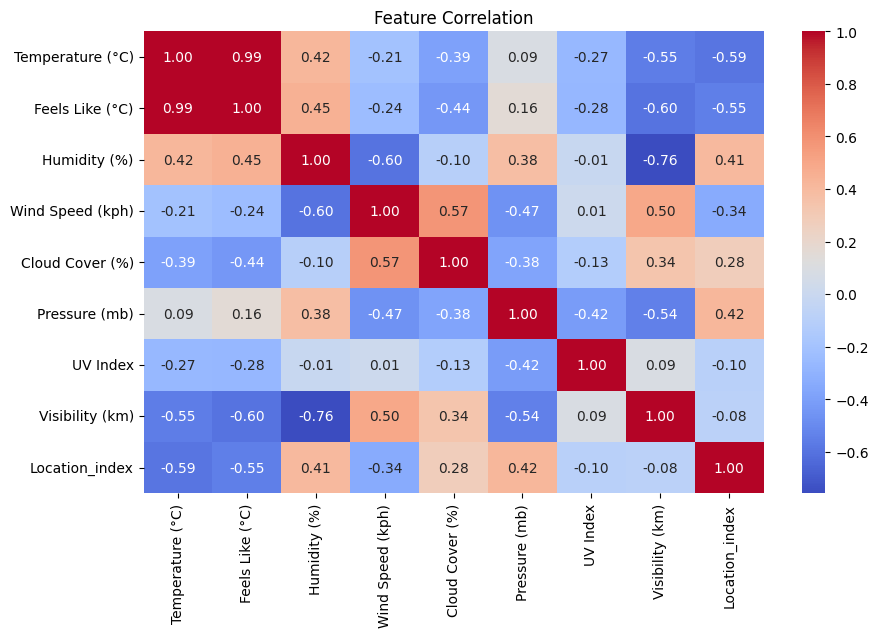

In [ ]:
# Select only numeric colunmns before correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

## Box Plot: Humidity

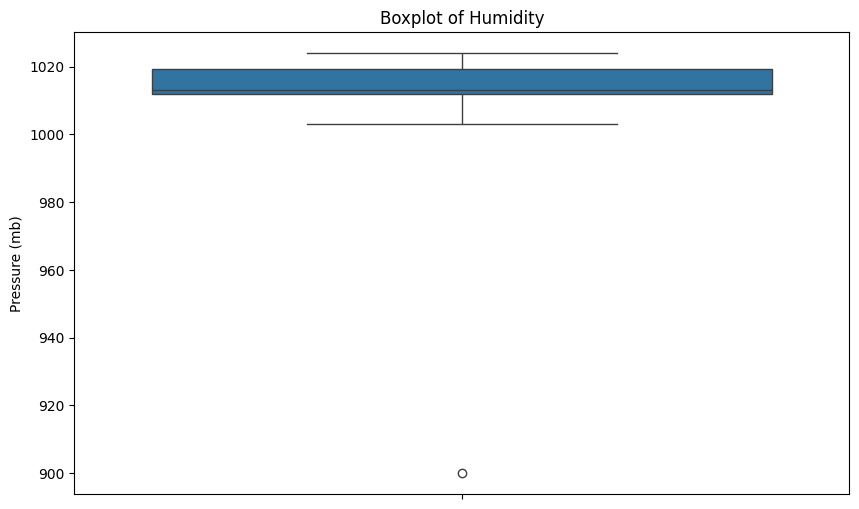

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df['Pressure (mb)'])
plt.title('Boxplot of Humidity')
plt.show()

## Defining Features and Target Variable

In [ ]:
# features
X = df[['Humidity (%)', 'Wind Speed (kph)', 'Pressure (mb)', 'Visibility (km)', 'Location_index']]
# target variable or label
y = df['Temperature (°C)']

## Standard Scaling

In [ ]:
# Standard scaling the values in features
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(df_scaled.describe())

       Humidity (%)  Wind Speed (kph)  Pressure (mb)  Visibility (km)  \
count    794.000000        794.000000     794.000000       794.000000   
mean      -0.118388          0.395739       0.005733         0.732997   
std        0.784709          0.574388       1.049442         1.966105   
min       -1.714286         -0.300000     -15.586207         0.000000   
25%       -0.428571         -0.161111      -0.137931         0.000000   
50%        0.000000          0.000000       0.000000         0.000000   
75%        0.571429          0.838889       0.862069         0.000000   
max        1.142857          1.161111       1.517241         6.000000   

       Location_index  
count      794.000000  
mean        -0.104998  
std          0.483490  
min         -0.842105  
25%         -0.631579  
50%          0.000000  
75%          0.368421  
max          0.631579  


## Test-Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Linear Regression Model

In [ ]:
model = LinearRegression()    # Create Linear Regression Model
model.fit(X_train, y_train)   # Fit model to training data

LinearRegression()

## Predictions

In [ ]:
y_pred = model.predict(X_test)    # Predict target variable using model

## Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)   # Calculate mean squared error
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse: .2f}')
print(f'R-squared Score: {r2: .2f}')

Mean Squared Error:  1.94
R-squared Score:  0.94


## Scatter Plot: Actual vs Predicted Temperature

<function matplotlib.pyplot.show(close=None, block=None)>

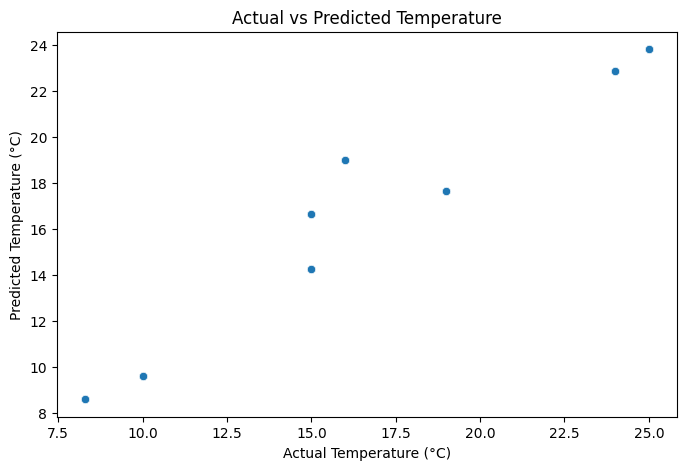

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.show

## Regression Models Comparison

In [ ]:
# Comparing Linear, Lasso and Ridge
# Define models
models = {
    'Simple Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[name] = {'MSE': mse, 'R² Score': r2}

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)


                               MSE  R² Score
Simple Linear Regression  1.936225  0.941366
Ridge Regression          1.937851  0.941317
Lasso Regression          2.042094  0.938160


The Lasso Regression has a better r2 but the highest MSE but the Ridge and simple have similar R2 and MSE but the MSE for the simple is slightly lower

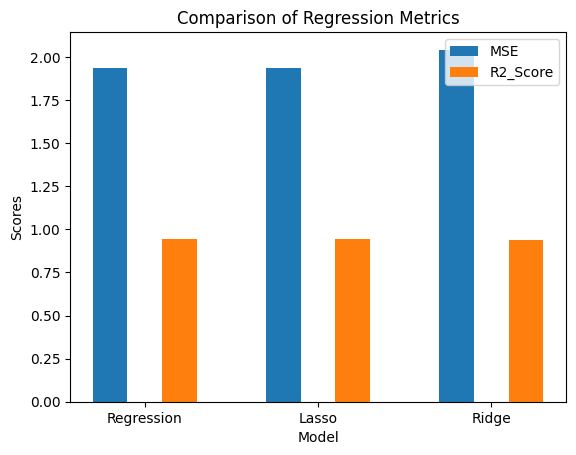

In [ ]:
# Plot comparison
mse = results_df['MSE']
r2_score = results_df['R² Score']

positions = np.arange(len(mse))
bar_width = 0.2

plt.bar(positions - bar_width, mse, width = bar_width, label = 'MSE')
plt.bar(positions + bar_width, r2_score, width = bar_width, label = 'R2_Score')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Regression Metrics')

# Adding the legend
plt.legend()
plt.xticks(positions, ['Regression', 'Lasso', 'Ridge'])
plt.show()
